In [ ]:
import numpy as np
import scipy.signal as signal
import soundfile as sf
import matplotlib.pyplot as plt

# Load the original audio file
original_sound, samplerate = sf.read('test.mp3')

# Generate a filter with the opposite phase and equal frequency
inverse_filter = -1 * np.flip(original_sound)

# Apply the filter to the original sound to cancel it out
destructive_sound = signal.convolve(original_sound, inverse_filter, mode='same')

# Visualize the original sound and the destructive sound
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
ax1.plot(original_sound)
ax1.set_title('Original Sound')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax2.plot(destructive_sound)
ax2.set_title('Destructive Sound')
ax2.set_xlabel('Time')
ax2.set_ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Write the output to a new audio file
sf.write('destructive.mp3', destructive_sound, samplerate)


In [ ]:
import numpy as np
import scipy.signal as signal
import soundfile as sf

# Load the original audio file
original_sound, samplerate = sf.read('test.mp3')

# Generate a filter with the same frequency as the original sound but opposite phase
freq_response = np.fft.rfft(original_sound)
freq_response = np.concatenate((freq_response, np.zeros_like(freq_response)))
inverse_filter = np.fft.irfft(-freq_response)

# Apply the inverse filter to the original sound to cancel it out
cancellation_signal = signal.convolve(original_sound, inverse_filter, mode='same')

# Adjust the amplitude of the cancellation signal to achieve minimal volume from the outside
desired_rms = 0.1
rms = np.sqrt(np.mean(cancellation_signal**2))
adjusted_cancellation_signal = cancellation_signal * (desired_rms / rms)

# Write the output to a new audio file
sf.write('adjusted_cancellation_signal.mp3', adjusted_cancellation_signal, samplerate)


In [ ]:
import numpy as np
import scipy.signal as signal
import soundfile as sf

# Load the original audio file
original_sound, samplerate = sf.read('test.mp3')

# Load the cancellation signal
cancellation_signal, _ = sf.read('adjusted_cancellation_signal.mp3')

# Add the original and cancellation signals together to achieve noise cancellation
canceled_sound = original_sound + cancellation_signal

# Write the output to a new audio file
sf.write('canceled_sound.mp3', canceled_sound, samplerate)


In [1]:
with open('transcription.txt', 'r') as f:
    lines = f.readlines()
formatted_lines = []
for i in range(0, len(lines), 2):
    start_timestamp = lines[i].strip()
    sentence = lines[i+1].strip()
    if i+2 < len(lines):
        next_start_timestamp = lines[i+2].strip()
        formatted_line = f"{start_timestamp}, {next_start_timestamp} : {sentence}"
    else:
        # if it's the last sentence, there is no next start timestamp
        formatted_line = f"{start_timestamp} : {sentence}"
    formatted_lines.append(formatted_line)

with open('formatted_transcription.txt', 'w') as f:
    f.write('\n'.join(formatted_lines))


In [5]:
import librosa
import numpy as np

# Load audio file
audio_file = 'trump.mp3'
y, sr = librosa.load(audio_file, sr=44100)

# Load transcription file
transcription_file = 'formatted_transcription.txt'
with open(transcription_file, 'r') as f:
    transcription_lines = f.readlines()

# Initialize empty arrays for audio and labels
audio_data = []
label_data = []

# Loop through transcription lines and extract audio and labels
for line in transcription_lines:
    line = line.strip()
    list1 = line.split(' : ')
    times = list1[0].split(",")
    fields= []
    if (len(times)==2):
        fields.append(times[0])
        fields.append(times[1])
        fields.append(list1[1])
        print(fields)
    else :
        fields.append(times[0])
        fields.append(list1[1])


['0:00', ' 0:02', 'My fellow Americans.']
['0:02', ' 0:05', 'I want to speak to you tonight about the']
['0:05', ' 0:08', 'troubling events of the past week.']
['0:08', ' 0:10', 'As I have said, the incursion of the U.S.']
['0:10', ' 0:14', 'Capitol struck at the very heart of our republic.']
['0:14', ' 0:18', 'It angered and appalled millions of Americans']
['0:18', ' 0:21', 'across the political spectrum.']
['0:21', ' 0:25', 'I want to be very clear; I unequivocally condemn']
['0:25', ' 0:29', 'the violence that we saw last week.']
['0:29', ' 0:32', 'Violence and vandalism have absolutely no place']
['0:32', ' 0:35', 'in our country and no place in our movement.']
['0:35', ' 0:38', 'Making America Great Again has always been about']
['0:38', ' 0:42', 'defending the rule of law, supporting the men and']
['0:42', ' 0:45', 'women of law enforcement, and upholding our']
['0:45', ' 0:48', "nation's most sacred traditions and values."]
['0:48', ' 0:52', 'Mob violence goes against everythin

In [8]:
import librosa
import numpy as np

# Load audio file
audio_file = 'trump.mp3'
y, sr = librosa.load(audio_file, sr=22050)

# Load transcription file
transcription_file = 'formatted_transcription.txt'
with open(transcription_file, 'r') as f:
    transcription_lines = f.readlines()

# Initialize empty arrays for audio and labels
audio_data = []
label_data = []

# Loop through transcription lines and extract audio and labels
for line in transcription_lines:
    line = line.strip()
    list1 = line.split(' : ')
    times = list1[0].split(",")
    fields = []
    if len(times) == 2:
        start_time = int(times[0].split(":")[0]) * 60 + int(times[0].split(":")[1])
        end_time = int(times[1].split(":")[0]) * 60 + int(times[1].split(":")[1])
        fields.append(start_time)
        fields.append(end_time)
        fields.append(list1[1])
    else:
        start_time = int(times[0].split(":")[0]) * 60 + int(times[0].split(":")[1])
        fields.append(start_time)
        fields.append(len(y))
        fields.append(list1[1])
    audio_clip = y[start_time:end_time]
    audio_data.append(audio_clip)
    label_data.append(list1[1])

for line in audio_data: 
    print(line)
for line in label_data:
    print (line)

[-6.661338e-15 -9.769963e-15]
[ 1.0658141e-14  6.2172489e-15 -1.4210855e-14]
[ 1.4210855e-14 -1.5987212e-14  1.3322676e-14]
[0.000000e+00 8.881784e-16]
[ 1.0658141e-14 -3.5527137e-15  8.8817842e-15 -9.7699626e-15]
[-4.4408921e-15 -1.0658141e-14  1.3322676e-15 -1.7763568e-14]
[ 1.0214052e-14 -7.1054274e-15  1.9539925e-14]
[-1.4210855e-14  1.0658141e-14 -3.9079850e-14  7.1054274e-15]
[-4.2632564e-14  1.7763568e-15 -1.7763568e-14  1.0658141e-14]
[ 2.6645353e-15 -2.6645353e-15  6.2172489e-15]
[8.881784e-16 5.595524e-14 9.103829e-15]
[ 1.0658141e-14 -3.0198066e-14  3.7303494e-14]
[3.5527137e-14 4.9737992e-14 7.4606987e-14 7.9936058e-14]
[-8.5265128e-14  2.5845992e-13 -4.5119464e-13]
[-9.4146912e-14 -2.3803182e-13 -1.5276669e-13]
[-2.6645353e-14 -2.2737368e-13  4.4408921e-14 -9.8410169e-13]
[ 6.5014660e-13 -1.7408297e-13  0.0000000e+00]
[5.4889426e-13 2.6645353e-13]
[ 6.6968653e-13  2.1316282e-13 -7.2830630e-14]
[-6.5725203e-14  2.7533531e-14  1.6715518e-12 -1.2558843e-12]
[-1.6413537e-12  9

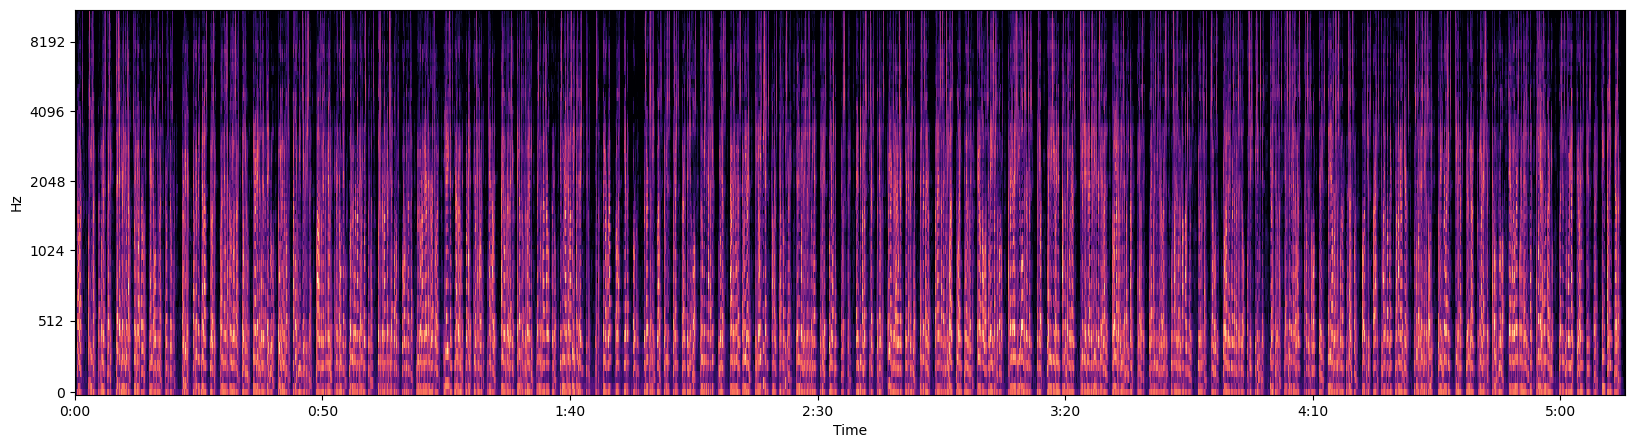

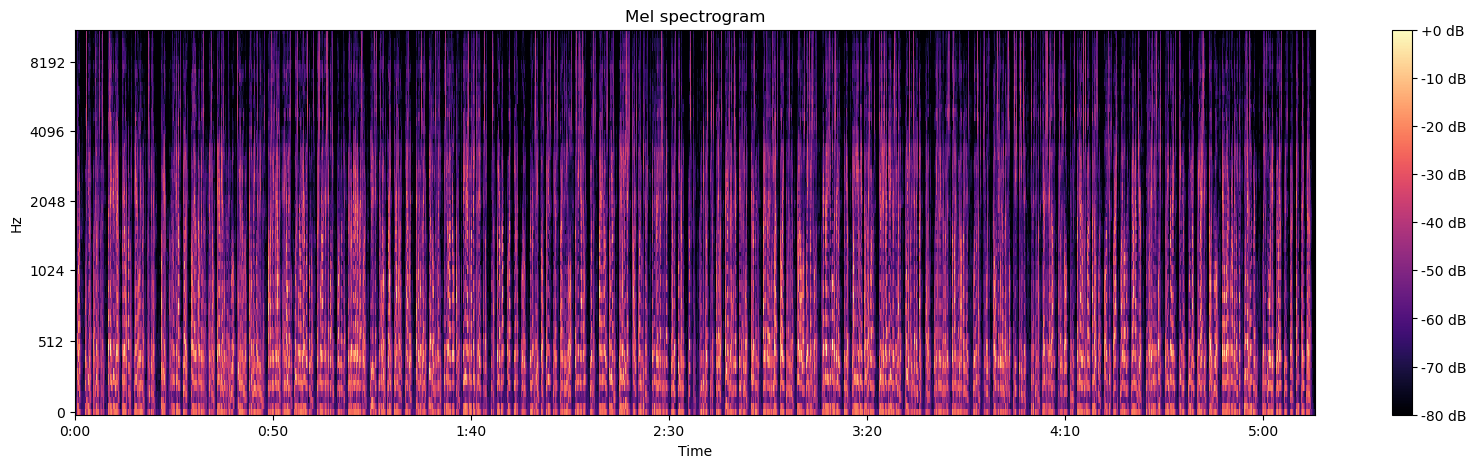

AttributeError: module 'matplotlib' has no attribute 'pyplot'

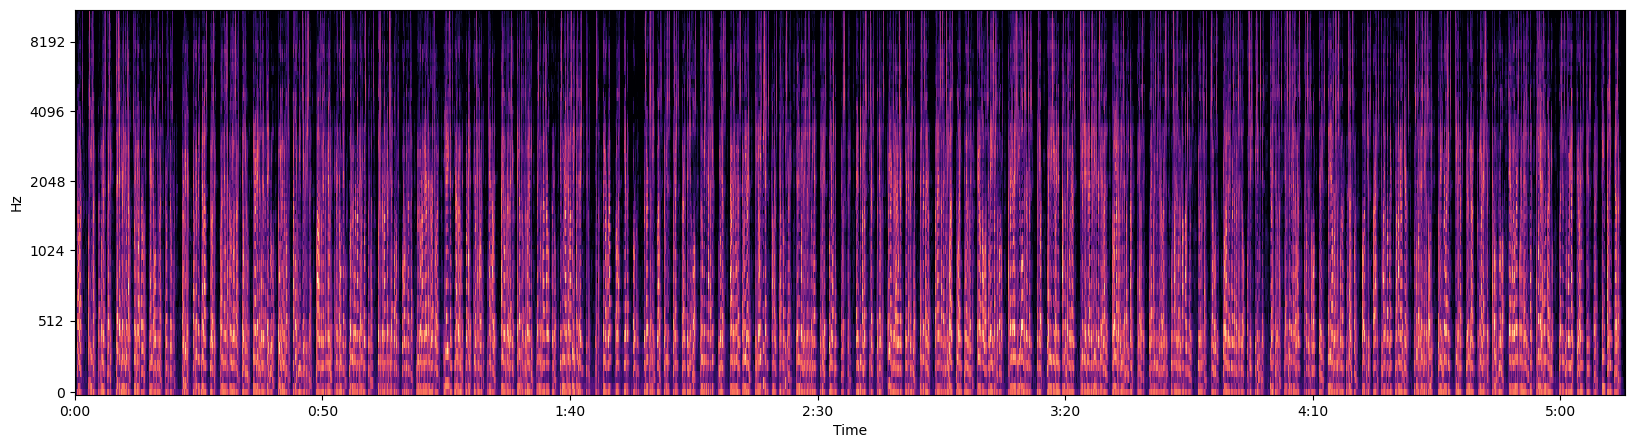

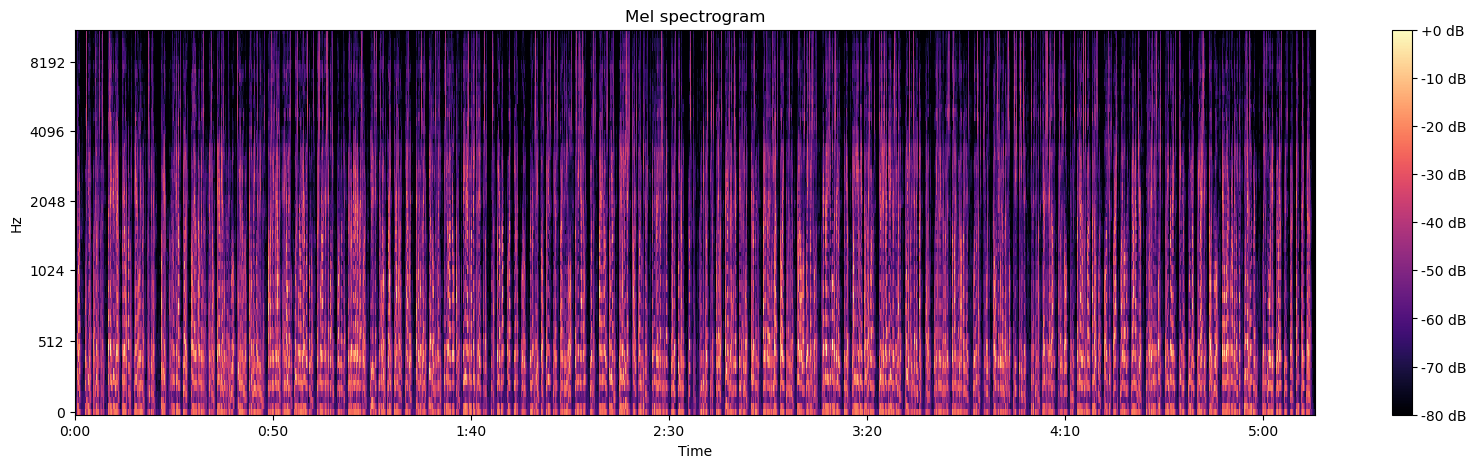

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
# Load audio file
audio_file = 'trump.mp3'
y, sr = librosa.load(audio_file, sr=22050)

# Compute mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=80, fmin=125, fmax=7600)

# Convert to decibels
log_S = librosa.power_to_db(S, ref=np.max)

# Display mel spectrogram
plt.figure(figsize=(20, 5))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.show()
# A spectrogram is a way of visualizing the frequencies of a sound over time. 
# A traditional spectrogram represents the frequency spectrum of a sound as a 
# function of time using a colormap, where brighter colors represent higher energy
# in that frequency band.


# However, the frequency scale in a traditional spectrogram is linear, which does 
# not always correspond well to how humans perceive sound. For example, two sounds 
# that are separated by an equal distance in Hertz can sound very different to us 
# depending on where they are in the frequency range.

# To address this, a mel spectrogram uses a different scale for the frequency axis 
# that is more closely related to human perception. It uses the mel scale, which is 
# a nonlinear scale that maps frequencies to mel values based on how they are perceived 
# by the human ear.

# A mel spectrogram is produced by taking a short-time Fourier transform of the audio 
# signal, applying a bank of mel filters to the magnitude spectrum, and then computing the
# logarithm of the filterbank energies. The result is a 2D array of values that represents 
# the energy in different frequency bands at different time intervals. This array can be 
# visualized as an image, where the x-axis represents time, the y-axis represents frequency
# in mel scale, and the color represents the energy in that frequency band.

# Mel spectrograms are commonly used in speech and music processing tasks, such as speech 
# recognition, speaker identification, and genre classification, among others.